# Heart Disease Prediction

## Import Libraries

In [3]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for plotting graphs
from sklearn.preprocessing import MinMaxScaler, StandardScaler # for feature scaling
from sklearn.preprocessing import LabelEncoder # for encoding categorical variables
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from imblearn.over_sampling import SMOTE
from collections import Counter

print("All imports successful")

All imports successful


## Import the dataset & print dataset

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame without truncation

In [5]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## Dataset Info

In [6]:
print(list(df.columns))
df.info()

['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sleep Hours', 'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level', 'Heart Disease Status']
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   str    
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   str    
 5   Smoking               9975 non-null   str    
 6   Family Heart Disease  9979 non-null   str    
 7   Diabetes              9970 non-null   str    
 8   BMI      

In [7]:
print(df.shape)

(10000, 21)


## Check data balance

### check balance in numeric format

In [8]:
# Updated to handle the new Pandas string behavior
for col in df.select_dtypes(include=['object', 'category', 'string']).columns:
    print(f"--- Column: {col} ---")
    print(df[col].value_counts(normalize=True) * 100)
    print("-" * 20)

--- Column: Gender ---
Gender
Male      50.125238
Female    49.874762
Name: proportion, dtype: float64
--------------------
--- Column: Exercise Habits ---
Exercise Habits
High      33.804511
Medium    33.403509
Low       32.791980
Name: proportion, dtype: float64
--------------------
--- Column: Smoking ---
Smoking
Yes    51.358396
No     48.641604
Name: proportion, dtype: float64
--------------------
--- Column: Family Heart Disease ---
Family Heart Disease
No     50.145305
Yes    49.854695
Name: proportion, dtype: float64
--------------------
--- Column: Diabetes ---
Diabetes
No     50.330993
Yes    49.669007
Name: proportion, dtype: float64
--------------------
--- Column: High Blood Pressure ---
High Blood Pressure
Yes    50.350912
No     49.649088
Name: proportion, dtype: float64
--------------------
--- Column: Low HDL Cholesterol ---
Low HDL Cholesterol
Yes    50.125313
No     49.874687
Name: proportion, dtype: float64
--------------------
--- Column: High LDL Cholesterol ---
H

### Get visualizations of databalance check

In [9]:
cat_cols = df.select_dtypes(include=['object', 'category', 'string']).columns
print(cat_cols)


Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='str')


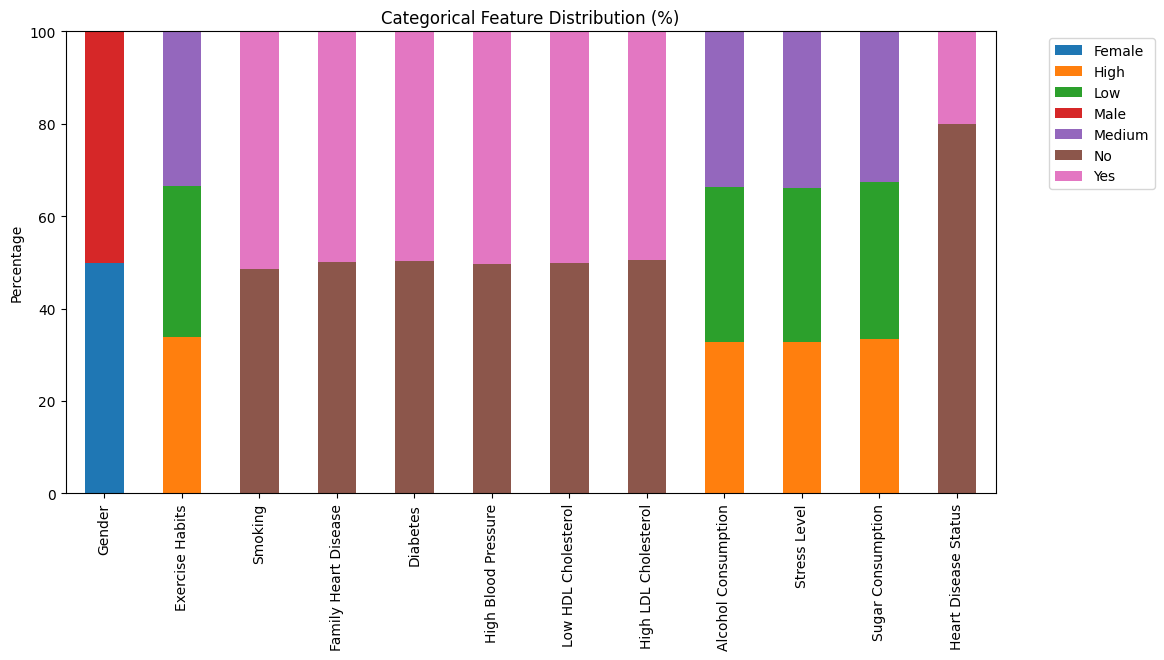

In [10]:
df[cat_cols].apply(lambda x: x.value_counts(normalize=True)*100)\
    .T.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Categorical Feature Distribution (%)")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()


In [11]:
# Check for Skewness (0 is perfectly balanced/symmetric)
print(df.select_dtypes(include=['number']).skew())

Age                   -0.006789
Blood Pressure         0.013907
Cholesterol Level     -0.007120
BMI                   -0.021342
Sleep Hours            0.000172
Triglyceride Level     0.006142
Fasting Blood Sugar   -0.008915
CRP Level             -0.004069
Homocysteine Level     0.007886
dtype: float64


# Data Cleaning

## Missing Value Handling

### Get a copy


In [12]:
df_firstDone = df.copy() # Create a copy of the original DataFrame to handle missing values

### Check missing value

In [13]:
print("Missing values before handling:")
print(df_firstDone.isnull().sum())

Missing values before handling:
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


### Fill missing values

In [14]:
df_firstDone ['Age'] = df_firstDone ['Age'].fillna(df_firstDone ['Age'].median())
df_firstDone['Gender'] = df_firstDone['Gender'].fillna(df_firstDone['Gender'].mode()[0])
df_firstDone['Blood Pressure'] = df_firstDone['Blood Pressure'].fillna(df_firstDone['Blood Pressure'].mean())
df_firstDone['Cholesterol Level'] = df_firstDone['Cholesterol Level'].fillna(df_firstDone['Cholesterol Level'].median())
df_firstDone['Exercise Habits'] = df_firstDone['Exercise Habits'].fillna(df_firstDone['Exercise Habits'].mode()[0]) #we use 0 ; bcz it retrieves the first mode value
df_firstDone['Smoking'] = df_firstDone['Smoking'].fillna(df_firstDone['Smoking'].mode()[0])
df_firstDone['Family Heart Disease'] = df_firstDone['Family Heart Disease'].fillna(df_firstDone['Family Heart Disease'].mode()[0])
df_firstDone['Diabetes'] = df_firstDone['Diabetes'].fillna(df_firstDone['Diabetes'].mode()[0])
df_firstDone['BMI'] = df_firstDone['BMI'].fillna(df_firstDone['BMI'].mean())
df_firstDone['High Blood Pressure'] = df_firstDone['High Blood Pressure'].fillna(df_firstDone['High Blood Pressure'].mode()[0])
df_firstDone['Low HDL Cholesterol'] = df_firstDone['Low HDL Cholesterol'].fillna(df_firstDone['Low HDL Cholesterol'].mode()[0])
df_firstDone['High LDL Cholesterol'] = df_firstDone['High LDL Cholesterol'].fillna(df_firstDone['High LDL Cholesterol'].mode()[0])
df_firstDone['Alcohol Consumption'] = df_firstDone['Alcohol Consumption'].fillna(df_firstDone['Alcohol Consumption'].mode()[0])
df_firstDone['Stress Level'] = df_firstDone['Stress Level'].fillna(df_firstDone['Stress Level'].mode()[0])  
df_firstDone['Sleep Hours'] = df_firstDone['Sleep Hours'].fillna(df_firstDone ['Sleep Hours'].mean())
df_firstDone ['Sugar Consumption'] = df_firstDone ['Sugar Consumption'].fillna(df_firstDone ['Sugar Consumption'].mode()[0])
df_firstDone['Triglyceride Level'] = df_firstDone['Triglyceride Level'].fillna(df_firstDone['Triglyceride Level'].mean())
df_firstDone['Fasting Blood Sugar'] = df_firstDone['Fasting Blood Sugar'].fillna(df_firstDone['Fasting Blood Sugar'].mean())
df_firstDone['CRP Level'] = df_firstDone['CRP Level'].fillna(df_firstDone['CRP Level'].mean())
df_firstDone['Homocysteine Level'] = df_firstDone['Homocysteine Level'].fillna(df_firstDone['Homocysteine Level'].mean())
df_firstDone['Heart Disease Status'] = df_firstDone['Heart Disease Status'].fillna(df_firstDone['Heart Disease Status'].mode()[0])





### After missing value handling

In [15]:
print("\nMissing values after handling:")
print(df_firstDone.isnull().sum())


Missing values after handling:
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


## Duplicate Handling

### Get a copy

In [16]:
df_missingDone = df_firstDone.copy()

### check for duplicates

In [17]:
duplicate_rows = df_missingDone[df_missingDone.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


## Outlier Handling

### Get a copy 

In [18]:
df_duplHandleDone = df_missingDone.copy()  # Create a copy of the original DataFrame to till handle missing values

In [19]:
df_duplHandleDone.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,120.142213,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.000000,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.000000,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.000000,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.000000,10.381259,8.153887,No


### Numeric Columns to Outlier Handle

In [20]:
# Select numeric columns only
num_cols = df_duplHandleDone.select_dtypes(include=np.number).columns

print("Numerical Columns:")
print(num_cols)

Numerical Columns:
Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='str')


### Outlier Visualization

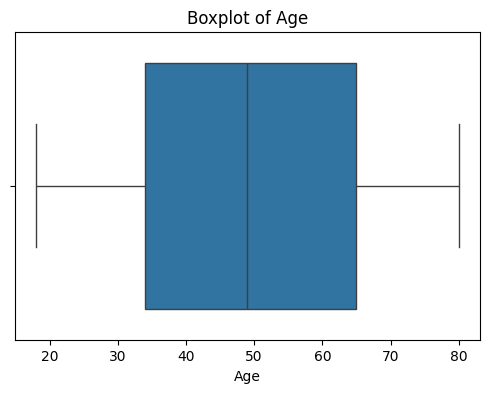

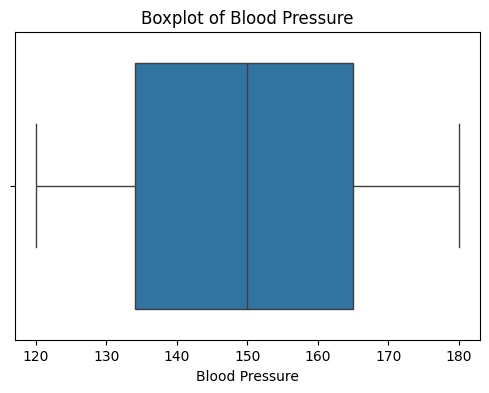

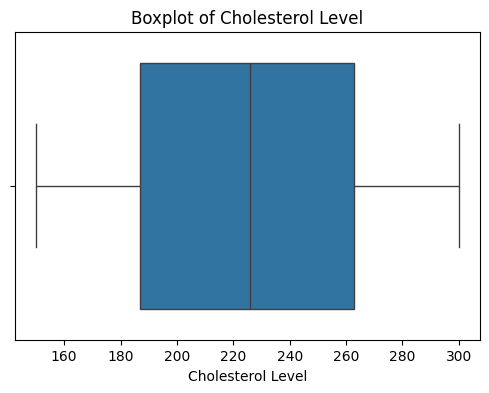

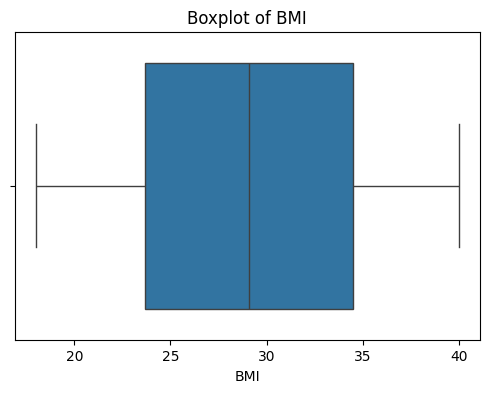

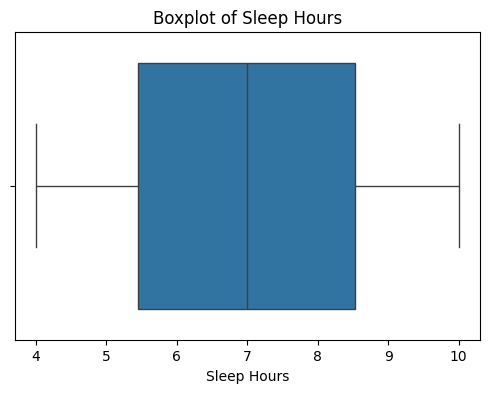

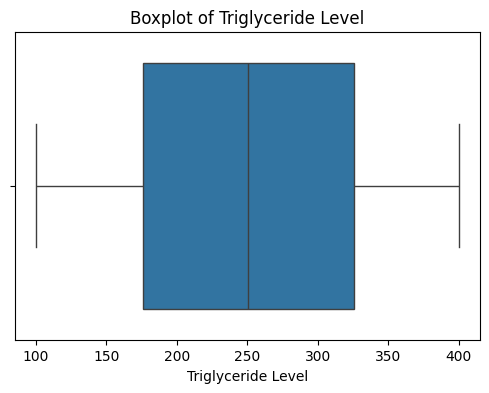

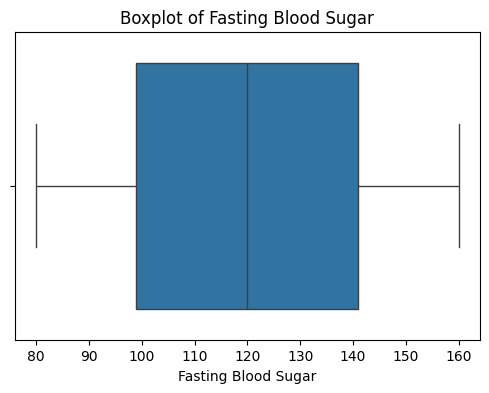

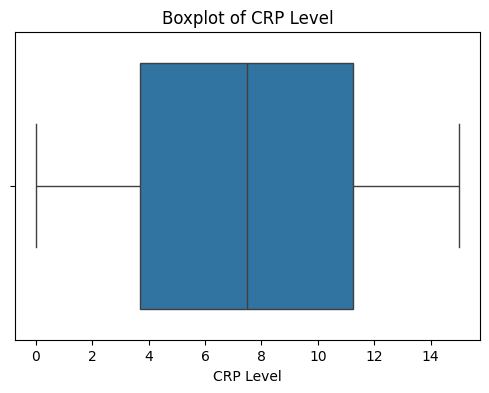

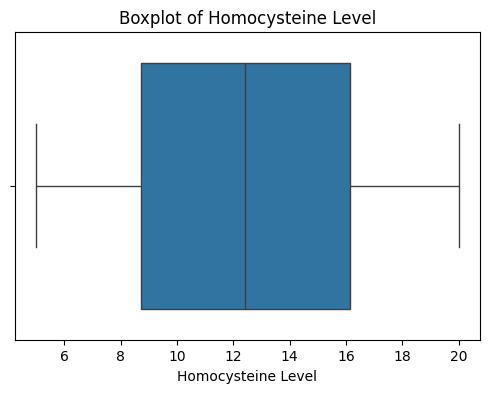

In [21]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_duplHandleDone[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### Using IQR Method

In [22]:
# IQR Outlier Detection
Q1 = df_duplHandleDone[num_cols].quantile(0.25)
Q3 = df_duplHandleDone[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df_duplHandleDone[num_cols] < lower_bound) | 
            (df_duplHandleDone[num_cols] > upper_bound))

print("Number of outliers per column:")
print(outliers.sum())


Number of outliers per column:
Age                    0
Blood Pressure         0
Cholesterol Level      0
BMI                    0
Sleep Hours            0
Triglyceride Level     0
Fasting Blood Sugar    0
CRP Level              0
Homocysteine Level     0
dtype: int64


## Encoding

### Get a copy

In [23]:

df_outHandleDone = df_duplHandleDone.copy()  # Create a copy of the original DataFrame to till handle missing values

### Start Encoding

In [24]:
le_gen = LabelEncoder()
le_exer = LabelEncoder()
le_smoke = LabelEncoder()   
le_fam = LabelEncoder()
le_diab = LabelEncoder()
le_hbp = LabelEncoder()
le_hdl = LabelEncoder()
le_ldl = LabelEncoder()
le_alc = LabelEncoder()
le_stress = LabelEncoder()
le_sugar = LabelEncoder()
le_hd = LabelEncoder()

In [25]:
df_outHandleDone['Gender'] = le_gen.fit_transform(df_outHandleDone['Gender'].astype(str))
df_outHandleDone['Exercise Habits'] = le_exer.fit_transform(df_outHandleDone['Exercise Habits'].astype(str))
df_outHandleDone['Smoking'] = le_smoke.fit_transform(df_outHandleDone['Smoking'].astype(str))
df_outHandleDone['Family Heart Disease'] = le_fam.fit_transform(df_outHandleDone['Family Heart Disease'].astype(str))
df_outHandleDone['Diabetes'] = le_diab.fit_transform(df_outHandleDone['Diabetes'].astype(str))
df_outHandleDone['High Blood Pressure'] = le_hbp.fit_transform(df_outHandleDone['High Blood Pressure'].astype(str))
df_outHandleDone['Low HDL Cholesterol'] = le_hdl.fit_transform(df_outHandleDone['Low HDL Cholesterol'].astype(str))
df_outHandleDone['High LDL Cholesterol'] = le_ldl.fit_transform(df_outHandleDone['High LDL Cholesterol'].astype(str))
df_outHandleDone['Alcohol Consumption'] = le_alc.fit_transform(df_outHandleDone['Alcohol Consumption'].astype(str))
df_outHandleDone['Stress Level'] = le_stress.fit_transform(df_outHandleDone['Stress Level'].astype(str))
df_outHandleDone['Sugar Consumption'] = le_sugar.fit_transform(df_outHandleDone['Sugar Consumption'].astype(str))
df_outHandleDone['Heart Disease Status'] = le_hd.fit_transform(df_outHandleDone['Heart Disease Status'].astype(str))

### Dataset Head & Tail After Encoding

In [26]:
print("\nData Head after encoding:")
display(df_outHandleDone.head())


Data Head after encoding:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,1,0,0,2,7.633228,2,342.0,120.142213,12.969246,12.387250,0
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,1,0,2,0,8.744034,2,133.0,157.000000,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,1,1,1,1,4.440440,1,393.0,92.000000,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,0,1,1,0,5.249405,0,293.0,94.000000,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,0,0,1,0,7.030971,0,263.0,154.000000,10.381259,8.153887,0


In [27]:
print("\nData Tail after encoding:")
display(df_outHandleDone.tail())


Data Tail after encoding:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
9995,25.0,0,136.0,243.0,2,1,0,0,18.788791,1,0,1,2,0,6.834954,2,343.0,133.0,3.588814,19.132004,1
9996,38.0,1,172.0,154.0,2,0,0,0,31.856801,1,0,1,2,0,8.247784,1,377.0,83.0,2.658267,9.715709,1
9997,73.0,1,152.0,201.0,0,1,0,1,26.899911,0,1,1,2,1,4.436762,1,248.0,88.0,4.408867,9.492429,1
9998,23.0,1,142.0,299.0,1,1,0,1,34.964026,1,0,1,2,0,8.526329,2,113.0,153.0,7.215634,11.873486,1
9999,38.0,0,128.0,193.0,2,1,1,1,25.111295,0,1,1,0,2,5.659394,0,121.0,149.0,14.387810,6.208531,1


# Feature Engineering

### Get a copy 

In [28]:
df_encodedDone = df_outHandleDone.copy()  # Create a copy of the original DataFrame to till encoding

### Create New Features

In [29]:
#1 UNDIAGNOSED / HIDDEN CONDITIONS

df_encodedDone['Undiagnosed_Hypertension'] = (
    (df_encodedDone['High Blood Pressure'] == 0) &
    (df_encodedDone['Blood Pressure'] > 140)
).astype(int)

df_encodedDone['Undiagnosed_Diabetes'] = (
    (df_encodedDone['Diabetes'] == 0) &
    (df_encodedDone['Fasting Blood Sugar'] > 126)
).astype(int)

df_encodedDone['Hidden_Hyperlipidemia'] = (
    (df_encodedDone['Cholesterol Level'] > 240) &
    (df_encodedDone['High LDL Cholesterol'] == 0)
).astype(int)

In [30]:
#2 INTERACTION FEATURES

df_encodedDone['Stress_Sleep_Interaction'] = (
    df_encodedDone['Stress Level'] /
    (df_encodedDone['Sleep Hours'] + 1)
)

df_encodedDone['Inflammation_Index'] = (
    df_encodedDone['CRP Level'] *
    df_encodedDone['Homocysteine Level']
)

df_encodedDone['Age_BMI_Interaction'] = (
    df_encodedDone['Age'] *
    df_encodedDone['BMI']
)

In [31]:
#3 DOMAIN RATIOS

df_encodedDone['Lipid_Risk_Ratio'] = (
    df_encodedDone['Triglyceride Level'] /
    df_encodedDone['Cholesterol Level']
)

df_encodedDone['Sugar_Load'] = (
    df_encodedDone['Fasting Blood Sugar'] *
    df_encodedDone['Sugar Consumption']
)

### Dataset after Feature Engineering

In [32]:
df_encodedDone.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,Undiagnosed_Hypertension,Undiagnosed_Diabetes,Hidden_Hyperlipidemia,Stress_Sleep_Interaction,Inflammation_Index,Age_BMI_Interaction,Lipid_Risk_Ratio,Sugar_Load
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,1,0,0,2,7.633228,2,342.0,120.142213,12.969246,12.387250,0,0,0,0,0.231663,160.653294,1399.529101,2.206452,240.284426
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,1,0,2,0,8.744034,2,133.0,157.000000,9.355389,19.298875,0,1,0,1,0.000000,180.548495,1740.304098,0.465035,314.000000
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,1,1,1,1,4.440440,1,393.0,92.000000,12.709873,11.230926,0,0,0,0,0.183809,142.743634,1373.350569,1.819444,92.000000
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,0,1,1,0,5.249405,0,293.0,94.000000,12.509046,5.961958,0,0,0,0,0.000000,74.578409,772.175260,1.000000,0.000000
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,0,0,1,0,7.030971,0,263.0,154.000000,10.381259,8.153887,0,0,0,1,0.000000,84.647614,1229.177333,1.086777,0.000000


In [33]:
df_encodedDone.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,Undiagnosed_Hypertension,Undiagnosed_Diabetes,Hidden_Hyperlipidemia,Stress_Sleep_Interaction,Inflammation_Index,Age_BMI_Interaction,Lipid_Risk_Ratio,Sugar_Load
9995,25.0,0,136.0,243.0,2,1,0,0,18.788791,1,0,1,2,0,6.834954,2,343.0,133.0,3.588814,19.132004,1,0,1,0,0.000000,68.661208,469.719777,1.411523,266.0
9996,38.0,1,172.0,154.0,2,0,0,0,31.856801,1,0,1,2,0,8.247784,1,377.0,83.0,2.658267,9.715709,1,0,0,0,0.000000,25.826944,1210.558430,2.448052,83.0
9997,73.0,1,152.0,201.0,0,1,0,1,26.899911,0,1,1,2,1,4.436762,1,248.0,88.0,4.408867,9.492429,1,1,0,0,0.183933,41.850857,1963.693495,1.233831,88.0
9998,23.0,1,142.0,299.0,1,1,0,1,34.964026,1,0,1,2,0,8.526329,2,113.0,153.0,7.215634,11.873486,1,0,0,0,0.000000,85.674727,804.172589,0.377926,306.0
9999,38.0,0,128.0,193.0,2,1,1,1,25.111295,0,1,1,0,2,5.659394,0,121.0,149.0,14.387810,6.208531,1,0,0,0,0.300328,89.327166,954.229192,0.626943,0.0


# Split(Train/Test)

### Get a copy 

In [34]:
df_featEngDone = df_encodedDone.copy()  # Create a copy of the original DataFrame to till encoding

### Train to  Test Split

In [35]:
X = df_featEngDone.drop('Heart Disease Status', axis=1)
y = df_featEngDone['Heart Disease Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [36]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (8000, 28)
y_train shape: (8000,)


# Scaling

## Scaling only Training data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

#Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance in the training data
smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_bal.value_counts())

Before SMOTE:
 Heart Disease Status
0    6400
1    1600
Name: count, dtype: int64

After SMOTE:
 Heart Disease Status
0    6400
1    6400
Name: count, dtype: int64


# Feature Selection

## Dataset Preparation

In [39]:
X_train_bal   # numpy array (scaled)
y_train_bal


0        0
1        0
2        1
3        1
4        0
        ..
12795    1
12796    1
12797    1
12798    1
12799    1
Name: Heart Disease Status, Length: 12800, dtype: int64

In [40]:
import pandas as pd

# Restore column names after SMOTE
X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


## 1. Filter Method

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

filter_selector = SelectKBest(score_func=f_classif, k=10)

X_train_filter = filter_selector.fit_transform(X_train_bal_df, y_train_bal)
X_test_filter = filter_selector.transform(X_test_scaled_df)

# Get selected feature names
filter_features = X_train_bal_df.columns[filter_selector.get_support()]

print("Selected Features (Filter Method):")
print(filter_features)


Selected Features (Filter Method):
Index(['Age', 'Gender', 'Diabetes', 'BMI', 'High LDL Cholesterol',
       'Sugar Consumption', 'Fasting Blood Sugar', 'Undiagnosed_Hypertension',
       'Undiagnosed_Diabetes', 'Sugar_Load'],
      dtype='str')


### Plots Visualization Filter Method

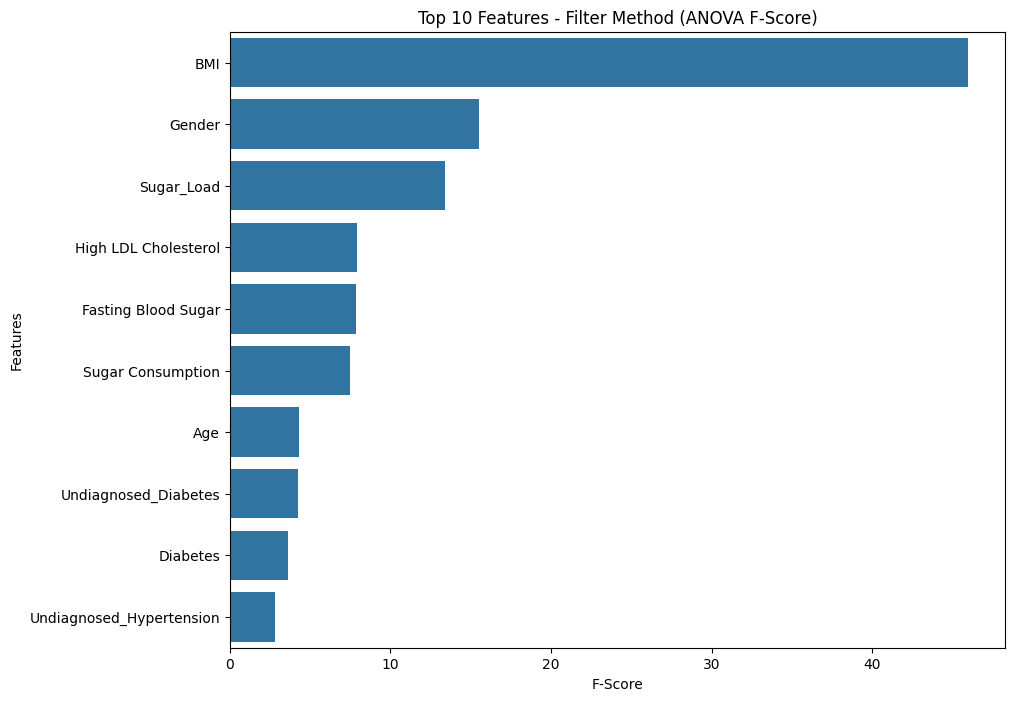

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Filter Method
filter_selector = SelectKBest(score_func=f_classif, k='all')
filter_selector.fit(X_train_bal_df, y_train_bal)

# Get scores
filter_scores = pd.Series(
    filter_selector.scores_,
    index=X_train_bal_df.columns
).sort_values(ascending=False)

# Plot Top 10
plt.figure(figsize=(10,8))
sns.barplot(
    x=filter_scores.head(10).values,
    y=filter_scores.head(10).index
)

plt.title("Top 10 Features - Filter Method (ANOVA F-Score)")
plt.xlabel("F-Score")
plt.ylabel("Features")
plt.show()


## 2. Wrapper Method

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Base model
model = LogisticRegression(max_iter=1000)

# Apply RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train_bal_df, y_train_bal)

# Create ranking Series
rfe_ranking = pd.Series(
    rfe.ranking_,
    index=X_train_bal_df.columns
).sort_values()



### Plot Visualization For Wrapper Method

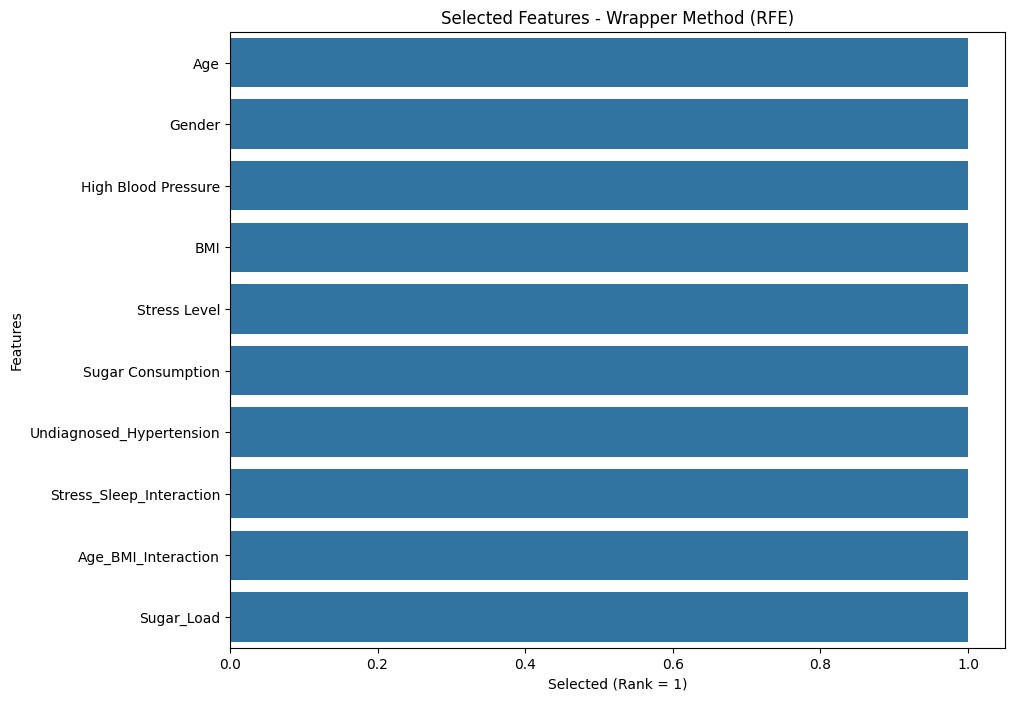

In [44]:
# Plot Top 10 (Rank 1 features)
top_rfe = rfe_ranking[rfe_ranking == 1]

plt.figure(figsize=(10,8))
sns.barplot(
    x=[1]*len(top_rfe),  # constant bar height
    y=top_rfe.index
)

plt.title("Selected Features - Wrapper Method (RFE)")
plt.xlabel("Selected (Rank = 1)")
plt.ylabel("Features")
plt.show()


## 3. Embedded Method

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_bal_df, y_train_bal)

importances = rf.feature_importances_

embedded_features = pd.Series(importances, index=X_train_bal_df.columns)
embedded_features = embedded_features.sort_values(ascending=False)

print("Top Features (Embedded Method):")
print(embedded_features.head(10))


Top Features (Embedded Method):
Exercise Habits        0.072031
Alcohol Consumption    0.062222
Fasting Blood Sugar    0.048418
BMI                    0.048368
Blood Pressure         0.048252
Homocysteine Level     0.047540
Cholesterol Level      0.047420
Sleep Hours            0.046005
Inflammation_Index     0.044690
CRP Level              0.044320
dtype: float64


### Plots Visualization Embedded Method

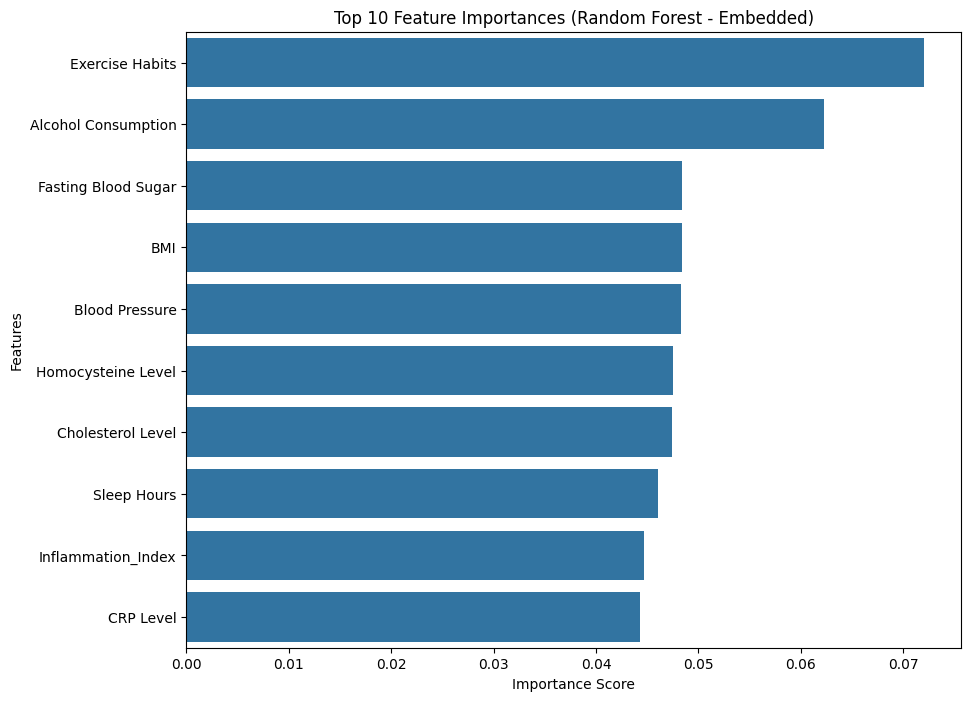

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(
    x=embedded_features.head(10).values,
    y=embedded_features.head(10).index
)

plt.title("Top 10 Feature Importances (Random Forest - Embedded)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## Select Best Features

### Print top features

In [47]:
print(embedded_features.head(10))


Exercise Habits        0.072031
Alcohol Consumption    0.062222
Fasting Blood Sugar    0.048418
BMI                    0.048368
Blood Pressure         0.048252
Homocysteine Level     0.047540
Cholesterol Level      0.047420
Sleep Hours            0.046005
Inflammation_Index     0.044690
CRP Level              0.044320
dtype: float64


### Select & Store

In [48]:
# Select top 10 best features
selected_features = embedded_features.head(10).index.tolist()

print("Final Selected Features:")
print(selected_features)


Final Selected Features:
['Exercise Habits', 'Alcohol Consumption', 'Fasting Blood Sugar', 'BMI', 'Blood Pressure', 'Homocysteine Level', 'Cholesterol Level', 'Sleep Hours', 'Inflammation_Index', 'CRP Level']


### Create Final training & Testing Data

In [49]:
# Keep only selected features
X_train_final = X_train_bal_df[selected_features]
X_test_final  = X_test_scaled_df[selected_features]

print(X_train_final.shape)
print(X_test_final.shape)


(12800, 10)
(2000, 10)


### Save the preprocessed dataset

In [50]:
# Full dataset after preprocessing (before split)
X_full = df_featEngDone[selected_features]
y_full = df_featEngDone["Heart Disease Status"]

final_dataset = X_full.copy()
final_dataset["Heart Disease Status"] = y_full

final_dataset.to_csv("heart_preprocessed_final.csv", index=False)

print("Preprocessed dataset saved successfully!")



Preprocessed dataset saved successfully!


# Train models

## Check train test data

In [51]:
X_train_final
X_test_final
y_train_bal
y_test


6177    0
9739    1
502     0
989     0
2237    0
       ..
9555    1
9857    1
5358    0
732     0
4992    0
Name: Heart Disease Status, Length: 2000, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## FUNCTION TO TRAIN + VISUALIZE ANY MODEL

In [53]:
def evaluate_model(model, model_name):
    
    # Train model
    model.fit(X_train_final, y_train_bal)

    # Predictions
    y_pred = model.predict(X_test_final)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    print("====================================")
    print(f"MODEL: {model_name}")
    print("Accuracy:", acc)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve (only if model supports probability)
    if hasattr(model, "predict_proba"):

        y_prob = model.predict_proba(X_test_final)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0,1], [0,1], linestyle="--")
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    else:
        print("ROC Curve not available for this model.\n")

    return acc


## Logistic Regression

MODEL: Logistic Regression
Accuracy: 0.513

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.53      0.63      1600
           1       0.19      0.45      0.27       400

    accuracy                           0.51      2000
   macro avg       0.49      0.49      0.45      2000
weighted avg       0.67      0.51      0.56      2000



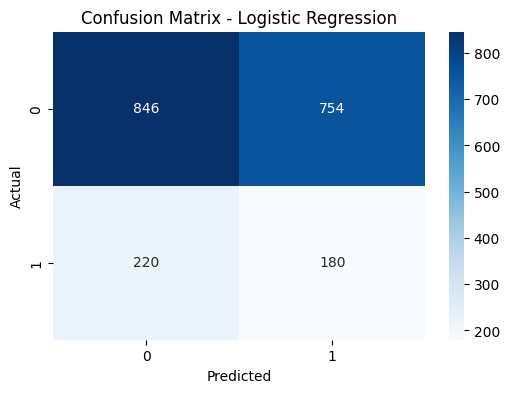

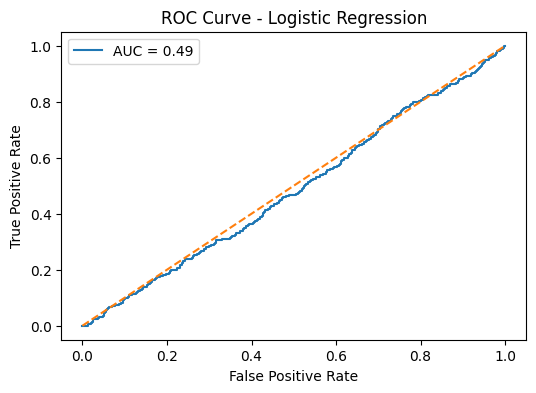

In [54]:
lr_model = LogisticRegression(max_iter=1000)

acc_lr = evaluate_model(lr_model, "Logistic Regression")


## RANDOM FOREST CLASSIFIER

MODEL: Random Forest
Accuracy: 0.757

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1600
           1       0.13      0.04      0.06       400

    accuracy                           0.76      2000
   macro avg       0.46      0.49      0.46      2000
weighted avg       0.66      0.76      0.70      2000



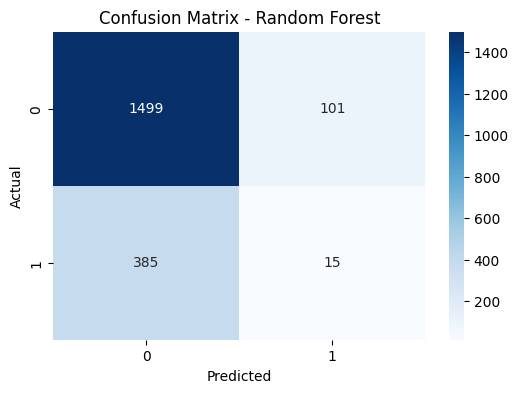

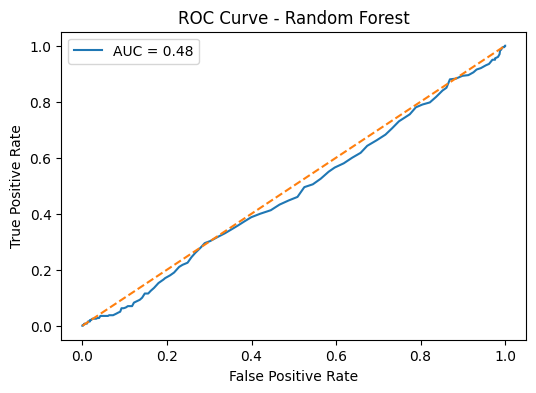

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

acc_rf = evaluate_model(rf_model, "Random Forest")


## SUPPORT VECTOR MACHINE (SVM)

MODEL: Support Vector Machine
Accuracy: 0.5365

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.59      0.67      1600
           1       0.17      0.33      0.22       400

    accuracy                           0.54      2000
   macro avg       0.47      0.46      0.45      2000
weighted avg       0.66      0.54      0.58      2000



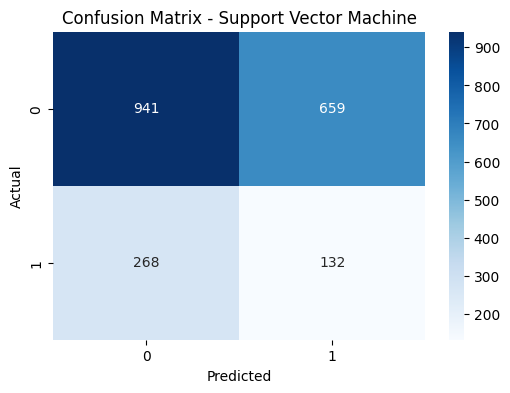

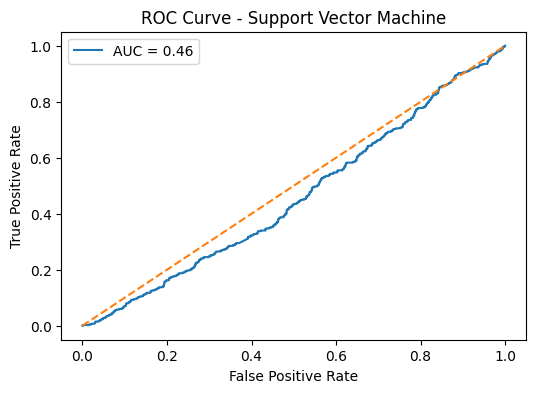

In [56]:
svm_model = SVC(kernel="rbf", probability=True)

acc_svm = evaluate_model(svm_model, "Support Vector Machine")


## K-NEAREST NEIGHBORS (KNN)

MODEL: KNN Classifier
Accuracy: 0.5255

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.54      0.65      1600
           1       0.20      0.45      0.28       400

    accuracy                           0.53      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.68      0.53      0.57      2000



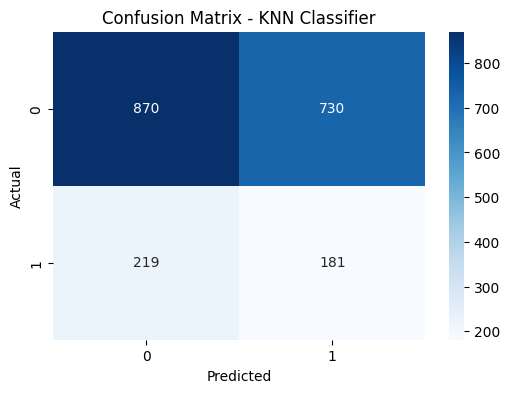

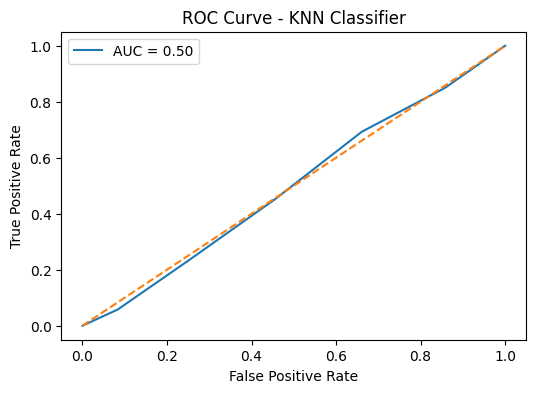

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=5)

acc_knn = evaluate_model(knn_model, "KNN Classifier")


## Model Comparison

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)
    
    return accuracy

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
acc_lr = evaluate_model(lr_model, "Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
acc_rf = evaluate_model(rf_model, "Random Forest")

# Support Vector Machine
svm_model = SVC(kernel="rbf", probability=True)
acc_svm = evaluate_model(svm_model, "Support Vector Machine")

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
acc_knn = evaluate_model(knn_model, "KNN Classifier")

--- Logistic Regression ---
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

------------------------------


c:\AIML_Projects\Heart_Diseases\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\AIML_Projects\Heart_Diseases\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\AIML_Projects\Heart_Diseases\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

--- Random Forest ---
Accuracy: 0.7990
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

------------------------------
--- Support Vector Machine ---
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       0.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

------------------------------
--- KNN Classifier ---
Accuracy: 0.7600
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1600
           1       0.15      0.04      0.07     

c:\AIML_Projects\Heart_Diseases\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\AIML_Projects\Heart_Diseases\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\AIML_Projects\Heart_Diseases\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

C:\Users\CYBORG\AppData\Local\Temp\ipykernel_19340\3717811966.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis")


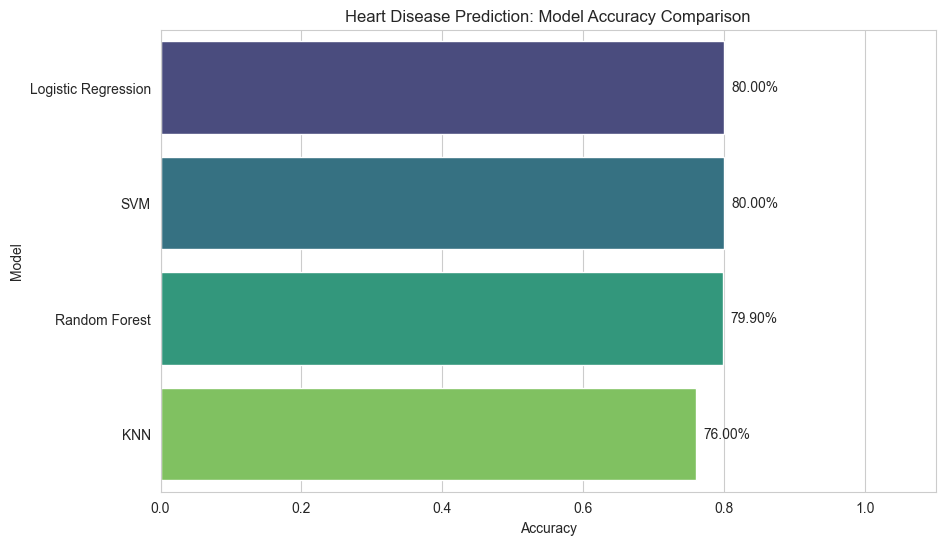

Model Comparison Summary:
                 Model  Accuracy
0  Logistic Regression     0.800
2                  SVM     0.800
1        Random Forest     0.799
3                  KNN     0.760


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary of results
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "KNN"],
    "Accuracy": [acc_lr, acc_rf, acc_svm, acc_knn]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by accuracy
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis")

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()*100:.2f}%', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.title("Heart Disease Prediction: Model Accuracy Comparison")
plt.xlim(0, 1.1) # Extend x-axis slightly for labels
plt.show()

print("Model Comparison Summary:")
print(df_results)

C:\Users\CYBORG\AppData\Local\Temp\ipykernel_19340\1401480854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


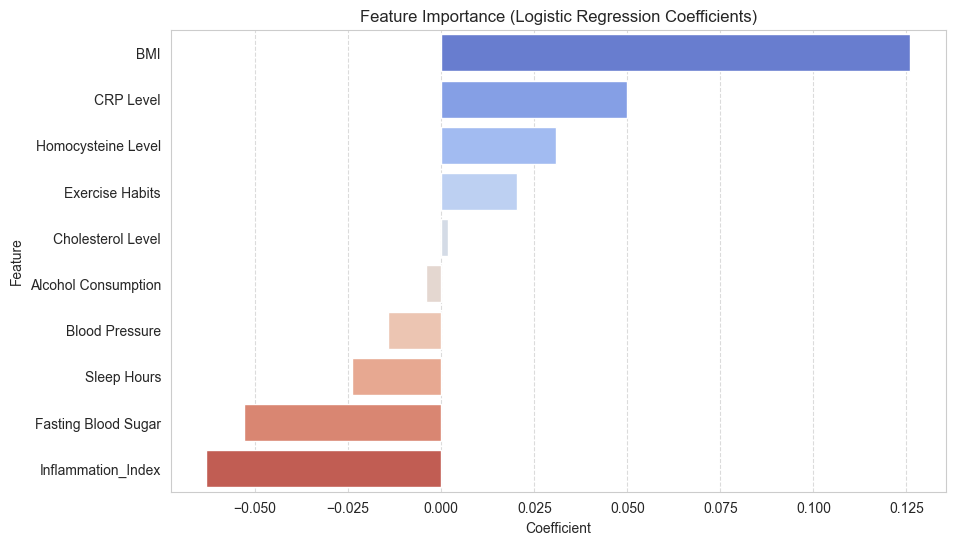

Feature Importance Summary:
               Feature  Coefficient
3                  BMI     0.126056
9            CRP Level     0.049795
5   Homocysteine Level     0.030962
0      Exercise Habits     0.020347
6    Cholesterol Level     0.001878
1  Alcohol Consumption    -0.004071
4       Blood Pressure    -0.014187
7          Sleep Hours    -0.023890
2  Fasting Blood Sugar    -0.053084
8   Inflammation_Index    -0.063216


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Ensure the model is trained on the final selected features
lr_model.fit(X_train_final, y_train_bal)

# Get coefficients
coefficients = lr_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': selected_features, 'Coefficient': coefficients})
feature_importance['Absolute_Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Feature Importance Summary:")
print(feature_importance[['Feature', 'Coefficient']])

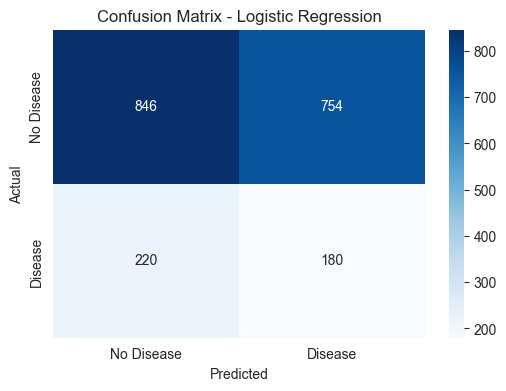

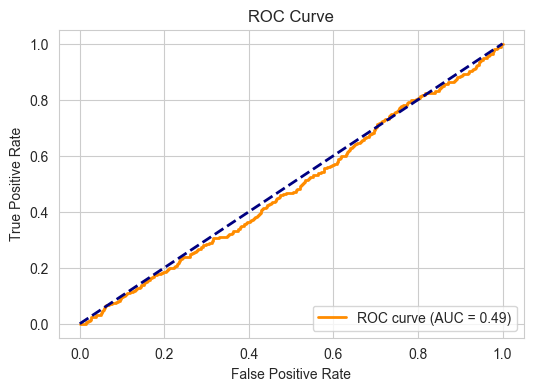

In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
y_pred = lr_model.predict(X_test_final)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. ROC Curve
y_prob = lr_model.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [65]:
# Create a dictionary to save all necessary components
model_assets = {
    'model': lr_model,
    'scaler': scaler,
    'selected_features': selected_features,
    'encoders': {
        'Gender': le_gen,
        'Exercise Habits': le_exer,
        'Smoking': le_smoke,
        'Family Heart Disease': le_fam,
        'Diabetes': le_diab,
        'High Blood Pressure': le_hbp,
        'Low HDL Cholesterol': le_hdl,
        'High LDL Cholesterol': le_ldl,
        'Alcohol Consumption': le_alc,
        'Stress Level': le_stress,
        'Sugar Consumption': le_sugar,
        'Heart Disease Status': le_hd
    }
}

# Save using joblib
joblib.dump(model_assets, 'heart_disease_model_package.pkl')

print("Model and all preprocessing assets saved as 'heart_disease_model_package.pkl'")

Model and all preprocessing assets saved as 'heart_disease_model_package.pkl'
